In [1]:
! pip install -U git+https://github.com/Adapter-Hub/adapter-transformers.git
! pip install datasets

  Cloning https://github.com/Adapter-Hub/adapter-transformers.git to /tmp/pip-req-build-4gq2neb4
  Running command git clone -q https://github.com/Adapter-Hub/adapter-transformers.git /tmp/pip-req-build-4gq2neb4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for adapter-transformers: filename=adapter_transformers-2.0.1-cp37-none-any.whl size=2099116 sha256=f47535218e2091b4e9da70560a11dbf0a1296437e36d19ade9e173ca8044fff6
  Stored in directory: /tmp/pip-ephem-wheel-cache-6wrjd2tz/wheels/b0/56/c9/5bf1c51cd513412090ad751ab10fc025210176bf0a82dd8af3
Successfully built adapter-transformers
  Found existing installation: adapter-transformers 2.0.1
    Uninstalling adapter-transformers-2.0.1:
      Successfully uninstalled adapter-transformers-2.0.1


In [2]:
cd drive/MyDrive/CAMemBERT-Adapters/


/content/drive/MyDrive/CAMemBERT-Adapters


Using custom data configuration default-6f5df3c8bc2d2d59


Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-6f5df3c8bc2d2d59/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0. Subsequent calls will reuse this data.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModelWithHeads: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModelWithHeads from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModelWithHeads from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch,Training Loss,Validation Loss,Loss,F1,Accuracy
1,No log,0.425644,0.435189,0.000000,0.970696
2,No log,0.336366,0.343296,0.047712,0.969209
3,No log,0.300729,0.306422,0.178851,0.939486
4,0.406300,0.293002,0.298476,0.200795,0.919640
5,0.406300,0.290777,0.296298,0.201993,0.918924


{'train_loss': 0.4351889193058014, 'train_f1': 0.0, 'train_accuracy': 0.9691732594936708, 'eval_loss': 0.42564383149147034, 'eval_f1': 0.0, 'eval_accuracy': 0.9706962025316456}
{'train_loss': 0.3432958424091339, 'train_f1': 0.04602510460251046, 'train_accuracy': 0.9675316455696202, 'eval_loss': 0.33636564016342163, 'eval_f1': 0.04771225838023, 'eval_accuracy': 0.9692088607594936}
{'train_loss': 0.30642175674438477, 'train_f1': 0.19278996865203762, 'train_accuracy': 0.9388844936708861, 'eval_loss': 0.30072852969169617, 'eval_f1': 0.17885131508319915, 'eval_accuracy': 0.9394857594936709}
{'train_loss': 0.2984755337238312, 'train_f1': 0.21352285824049175, 'train_accuracy': 0.9190189873417721, 'eval_loss': 0.29300230741500854, 'eval_f1': 0.20079468114402615, 'eval_accuracy': 0.9196400316455696}
{'train_loss': 0.29629844427108765, 'train_f1': 0.21433732648792544, 'train_accuracy': 0.9182792721518988, 'eval_loss': 0.29077717661857605, 'eval_f1': 0.2019934589627784, 'eval_accuracy': 0.9189240

Overwriting existing adapter 'tagging_bert_weighted_loss_func_adaptors_fce_grammar_dev_set_5epochs_16bs_1E-5lr_0layers_froze_fce_grammar'.
Overwriting existing head 'tagging_bert_weighted_loss_func_adaptors_fce_grammar_dev_set_5epochs_16bs_1E-5lr_0layers_froze_fce_grammar'



__________test set results__________


{'eval_loss': 0.29651349782943726, 'eval_f1': 0.20835090679038384, 'eval_accuracy': 0.9183267405063291}
_________plotting history__________
defaultdict(<class 'list'>, {('_loss', 'train'): [0.4351889193058014, 0.3432958424091339, 0.30642175674438477, 0.2984755337238312, 0.29629844427108765], ('_f1', 'train'): [0.0, 0.04602510460251046, 0.19278996865203762, 0.21352285824049175, 0.21433732648792544], ('_accuracy', 'train'): [0.9691732594936708, 0.9675316455696202, 0.9388844936708861, 0.9190189873417721, 0.9182792721518988], ('_loss', 'eval'): [0.42564383149147034, 0.33636564016342163, 0.30072852969169617, 0.29300230741500854, 0.29077717661857605], ('_f1', 'eval'): [0.0, 0.04771225838023, 0.17885131508319915, 0.20079468114402615, 0.2019934589627784], ('_accuracy', 'eval'): [0.9706962025316456, 0.9692088607594936, 0.9394857594936709, 0.9196400316455696, 0.9189240506329114], ('_runtime', 'train'): [289.8576], ('_samples_per_second', 'train'): [2.725]})


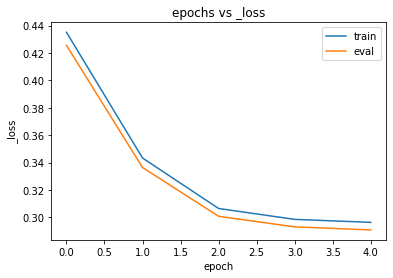

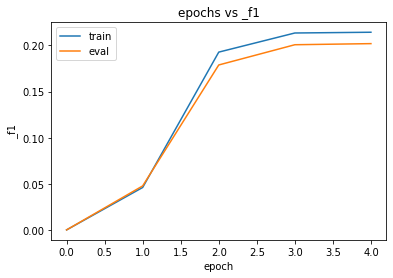

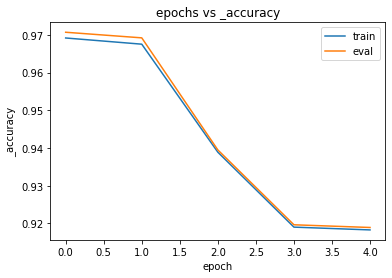

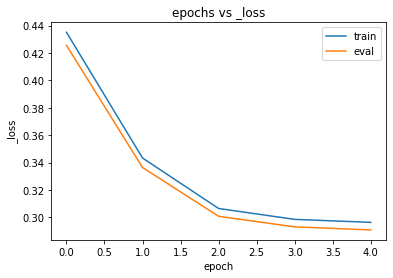

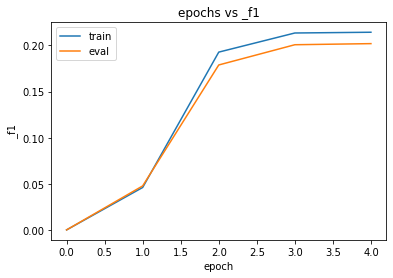

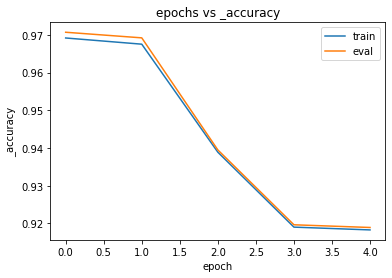

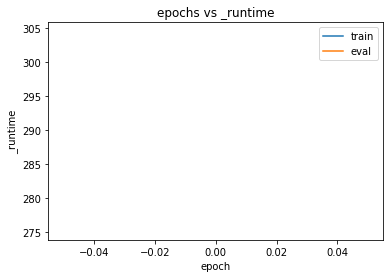

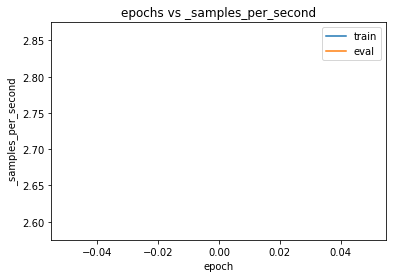

In [6]:
# import os, sys
# currentdir = os.path.dirname(os.path.realpath(__file__))
# preprocess_mod_ind = currentdir.split('/').index('CAMemBERT')
# preprocess_mod_path = '/'.join(currentdir.split('/')[:preprocess_mod_ind+1])
# sys.path.append(preprocess_mod_path)
from transformers import AutoTokenizer,EarlyStoppingCallback,TrainingArguments
from datasets import load_dataset,load_metric
from src.utils.preprocessing import read_pickle_file
from src.models.adaptor_models import TaggingModelAdaptors
from src.models.trainers import Seq2SeqTrainer
from src.models.running import *
from sklearn.metrics import r2_score,cohen_kappa_score
import torch
import torch.nn.functional as F
from datasets import load_metric,load_dataset
from sklearn.metrics import f1_score,accuracy_score
import ast
import numpy as np
import pandas as pd

def encode_data(data):
    encoded = tokenizer([" ".join(doc) for doc in data[tokenize_col]], pad_to_max_length=True, padding="max_length",
                        max_length=max_n_tokens, truncation=True, add_special_tokens=True)
    return (encoded)

def encode_labels(example):
    r_tags = []
    count = 0
    token2word = []
    tokens = ast.literal_eval(example[tokenize_col])
    labels = ast.literal_eval(example["labels"])

    for index, token in enumerate(tokenizer.tokenize(" ".join(tokens))):

        if token.startswith("##") or (token in tokens[index - count - 1].lower() and index - count - 1 >= 0):
            # if the token is part of a larger token and not the first we need to differ 
            # if it is a B (beginning) label the next one needs to ba assigned a I (intermediate) label
            # otherwise they can be labeled the same
            r_tags.append(r_tags[-1])
            count += 1
        else:
            
            r_tags.append(labels[index - count])

        token2word.append(index - count)


    r_tags = torch.tensor(r_tags)
    labels = {}
    # Pad token to maximum length for using batches
    labels["labels"] = F.pad(r_tags, pad=(1, max_n_tokens - r_tags.shape[0]), mode='constant', value=0)
    # Truncate if the document is too long
    labels["labels"] = labels["labels"][:max_n_tokens]

    return labels

def compute_metrics(p):
    logits, labels = p.predictions,p.label_ids
    logits = logits.flatten()
    labels = labels.flatten()
    metrics_dic = {}
    metrics_dic['f1'] = f1_score(logits, labels)
    metrics_dic['accuracy'] = accuracy_score(logits,labels)
    return metrics_dic

es = 2
lr = 1e-5
bs = 16
epochs = 5
frozen_layers = 0
metric_for_best_model = 'f1'
dev = True

tokenize_col='tokens'
max_n_tokens=128
extra_cols_for_dataset= []

params = generate_parameters(es,lr,bs,epochs,frozen_layers,metric_for_best_model,dev,max_n_tokens)

pre_trained_model_name = 'bert-base-uncased'
dataset_title = 'fce_grammar'
task = 'ged'
subtask = 'seq_2_seq'
abrev_name = f'tagging_bert_weighted_loss_func_adaptors_{dataset_title}'

file_paths = generate_file_paths(dataset_title,task,subtask,params,abrev_name)

dataset_dic = {'train':file_paths['train_file_path'],'test':file_paths['test_file_path'],'val':file_paths['val_file_path']}

dataset = load_dataset('csv', data_files=dataset_dic)

tokenizer = AutoTokenizer.from_pretrained(pre_trained_model_name)

dataset = dataset.map(encode_labels)
dataset = dataset.map(encode_data, batched=True, batch_size=16)

dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
# model.model(**test)

train_df_original = pd.read_csv(f'{file_paths["original_file_path"]}fce-public.train.original.tsv',sep='\s',names=['word','label'])
n_0, n_1 = train_df_original['label'].value_counts()
w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)
class_weights = [w_0,w_1]
class_weights_tensor=torch.FloatTensor([w_0, w_1]).cuda()

labels=['c','i']
num_labels = len(labels)
adapter_names=f'{file_paths["full_model_name"]}_{dataset_title}'
model = TaggingModelAdaptors(pre_trained_model_name,labels,adapter_names,class_weights_tensor)
model.activate_adapters()
model = model.model

training_args = base_training_args(params,file_paths)

callbacks = [EarlyStoppingCallback(es)]

trainer = Seq2SeqTrainer(model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["val"],
    compute_metrics=compute_metrics,
    callbacks=callbacks,)

trainer.train()

print()
print('__________test set results__________')
trainer.evaluate(dataset['test'],testing=True)
hist = trainer.state.log_history[-1]
eval_data = generate_eval_data(hist,params,task,subtask,pre_trained_model_name)
update_evaluation_results_for_this_model(f'{file_paths["evaluation_file_this_model"]}',eval_data)
update_evaluation_results_for_subtask(file_paths)

print('_________plotting history__________')
trainer.plot_history(file_paths['plots_path'],f'{file_paths["full_model_name"]}')